## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




In [2]:
dataset = pd.read_csv('bank-additional-full.csv')
print("Basic statistical information about numerical changes")
print(dataset.describe())
print("\nDataset size")
print(dataset.shape)

Basic statistical information about numerical changes
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  


**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [3]:
dataset["y"] = dataset["y"].map({'yes': 1, 'no':0}).astype(int)




In [4]:
bank_target = dataset[["y"]]
bank_target

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [5]:
bank_client = dataset[['age','job','marital','education','default','housing','loan']]

columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
for col in columns:
    print(f"Unique for {col}: {bank_client[col].unique()}\n")

Unique for age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Unique for job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique for marital: ['married' 'single' 'divorced' 'unknown']

Unique for education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique for default: ['no' 'unknown' 'yes']

Unique for housing: ['no' 'yes' 'unknown']

Unique for loan: ['no' 'yes' 'unknown']



**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Max Age:98

Min Age:17

Count of NaN:0


<Axes: xlabel='age', ylabel='Density'>

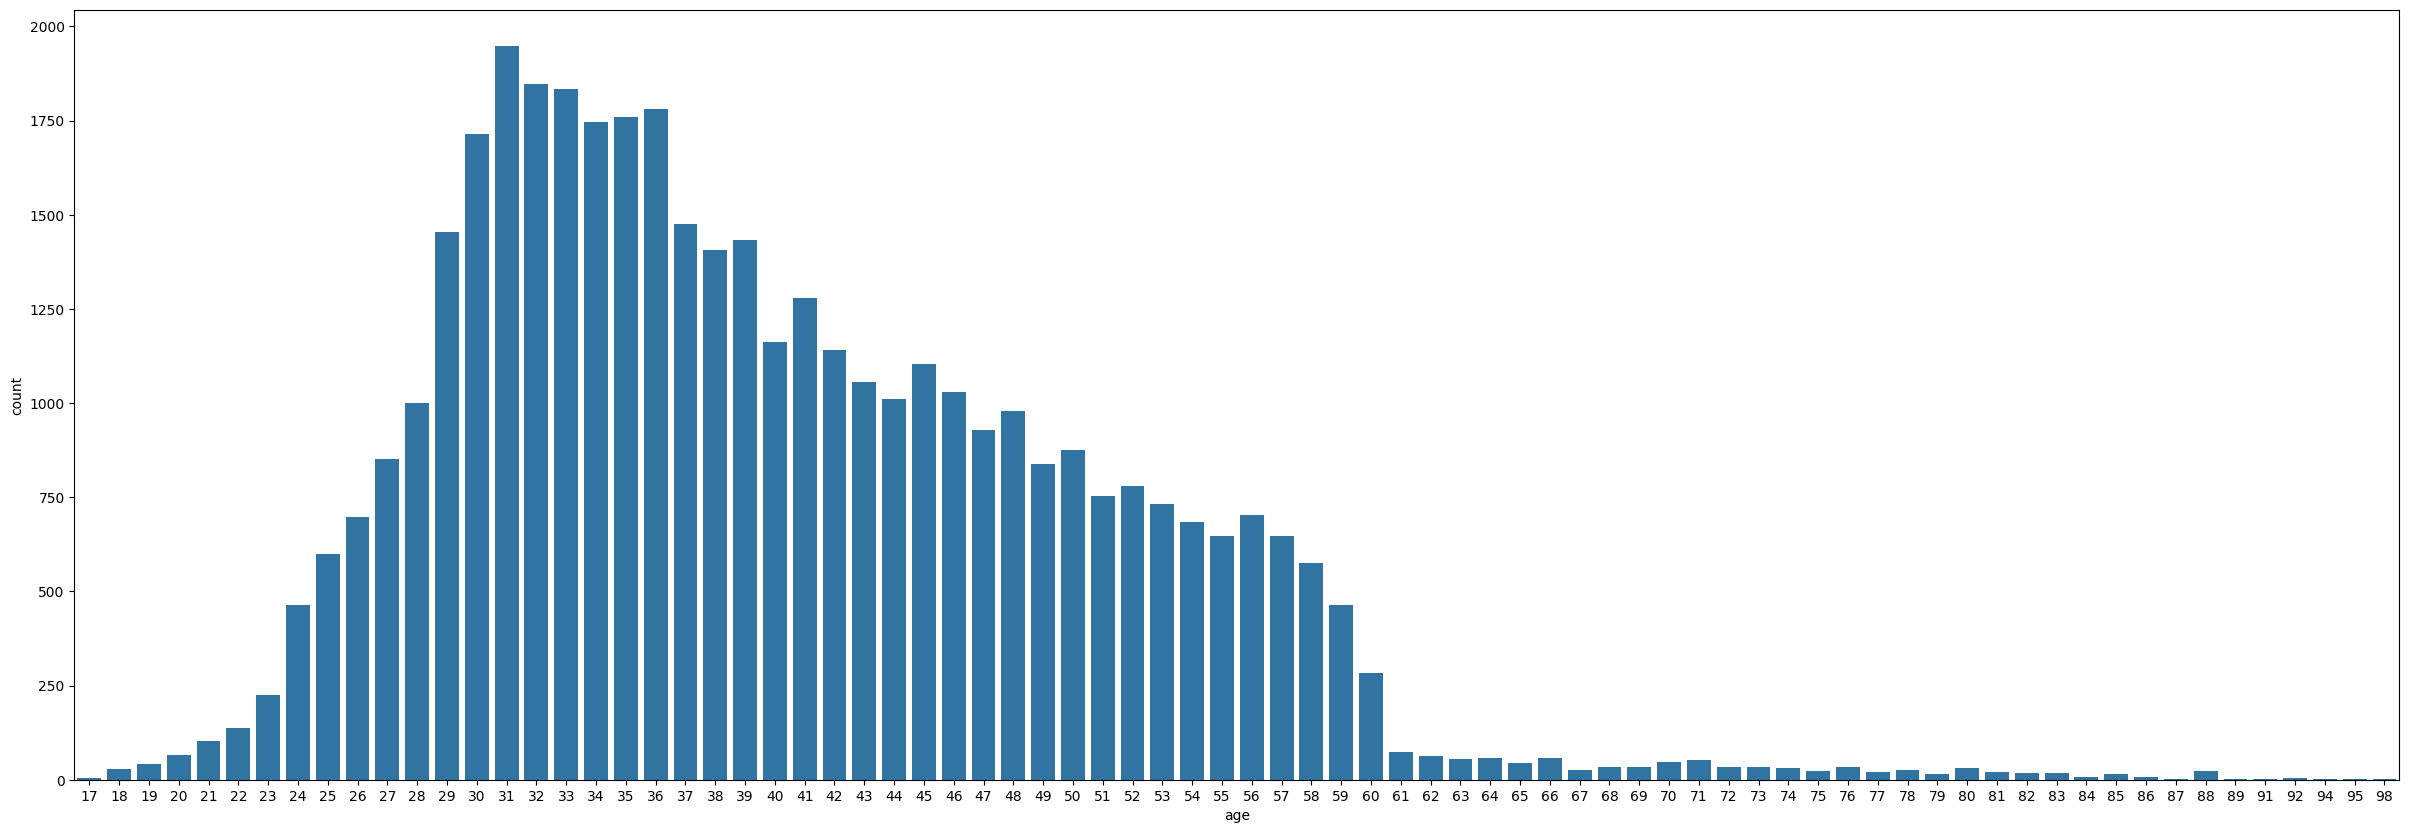

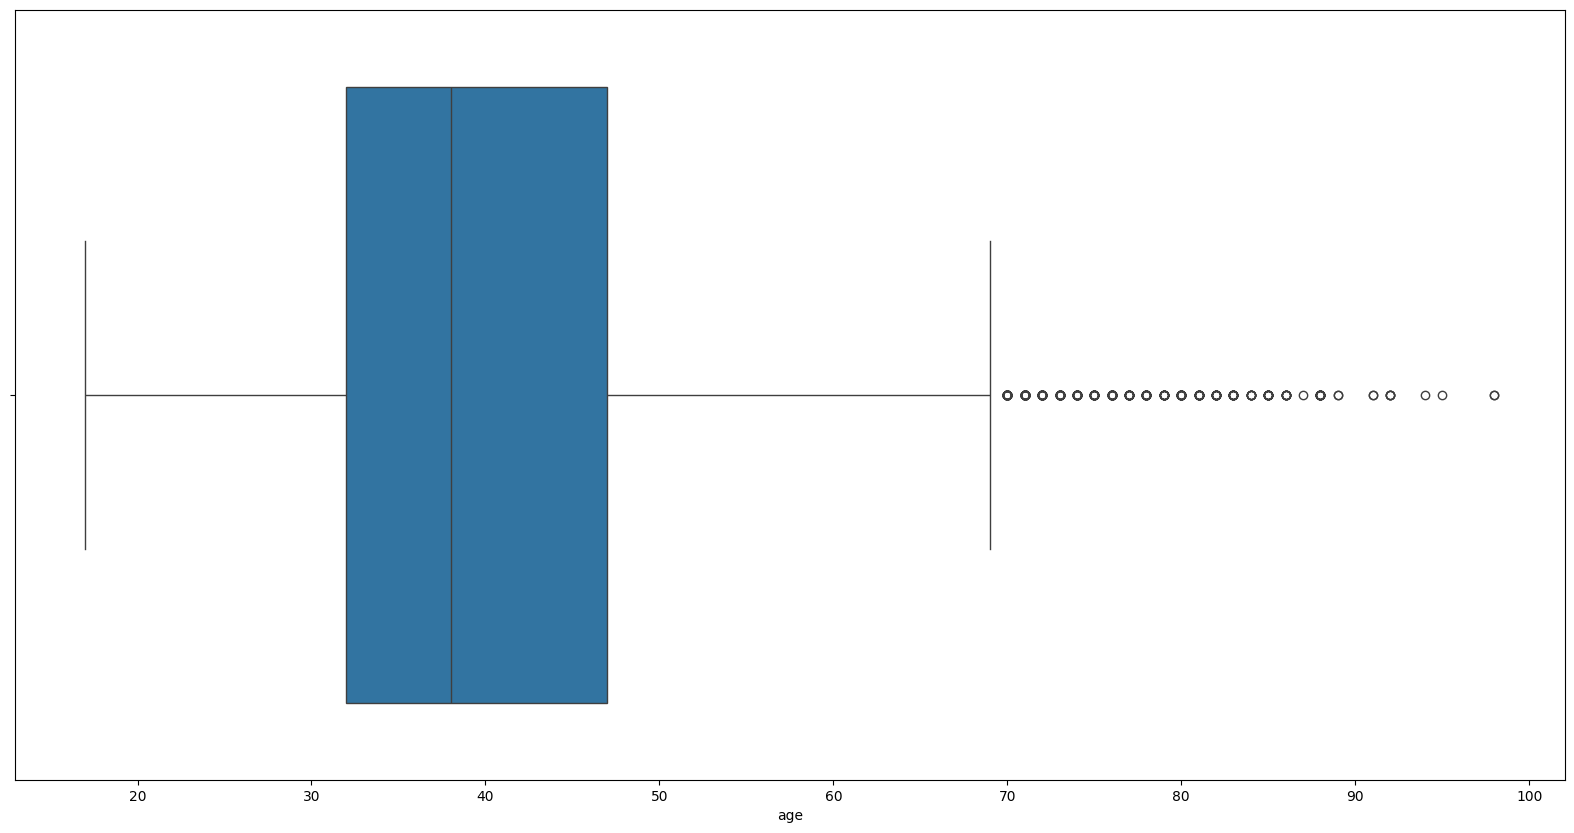

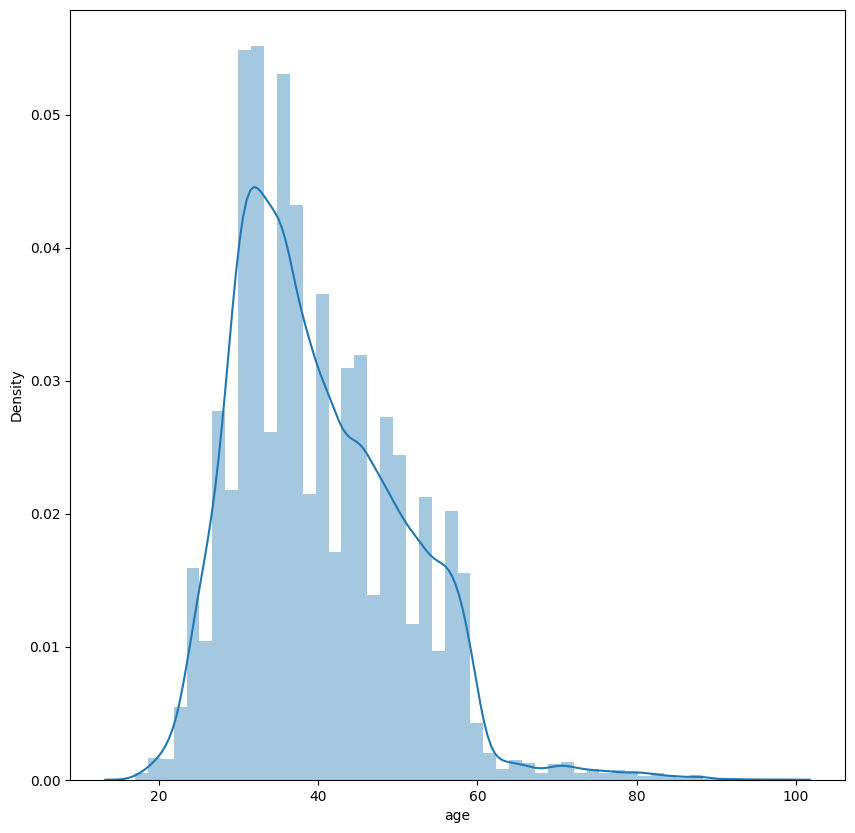

In [6]:
plt.figure(figsize=(30,10))
print(f"Max Age:{bank_client['age'].max()}\n")
print(f"Min Age:{bank_client['age'].min()}\n")
print(f"Count of NaN:{bank_client['age'].isna().sum()}")
sns.countplot(x='age',data=bank_client)
plt.figure(figsize=(20,10))
sns.boxplot(x='age',data=bank_client)
plt.figure(figsize=(10,10))
sns.distplot(bank_client['age'])


**Висновки з 1-4 завдання (детальні)**

1. Виведено базову статистичну інформацію про даний датсет, і його розмірність яка має 41188 стовпців і 21 рядків
2. Target atribyte був перетворений з категоріального в числову , де yes = 1, a no = 0
3. Всі атрибути які характерезували клієнтів банку були виділені в окремий датасет bank_client. Також були виведені всі унікальні значення всіх атрибутів

4.На виведених графіках можна замітити важкі праві хвости

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [7]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [8]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1. При перевірці появилось два викида, оскільки вони не попали в межі
2.   
3. ...

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

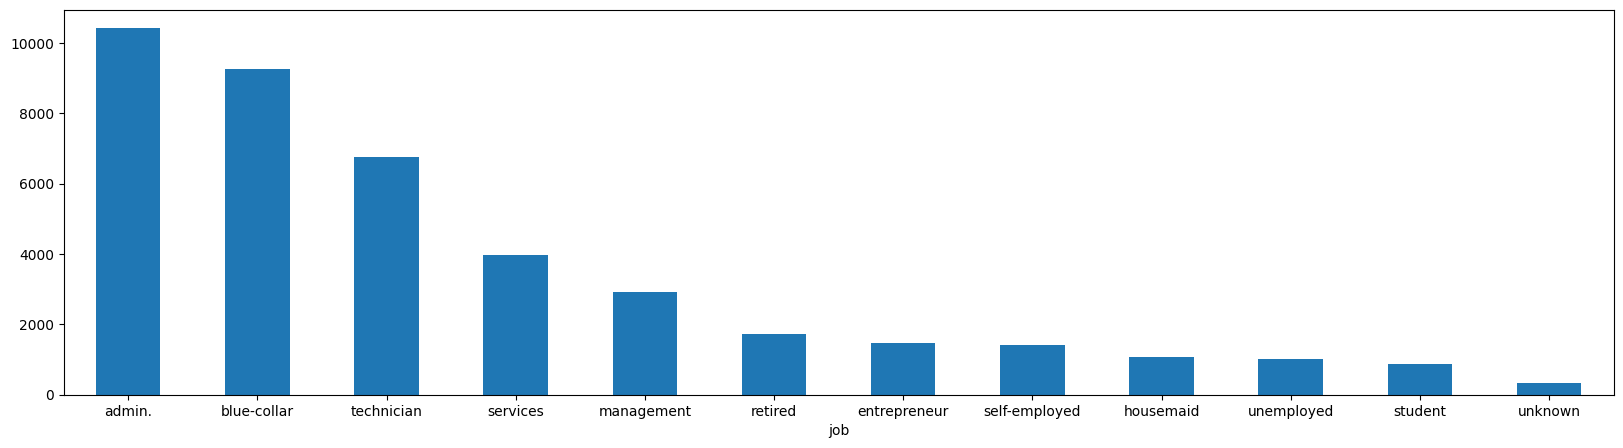

In [9]:
plt.figure(figsize=(20, 5))
bank_client['job'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

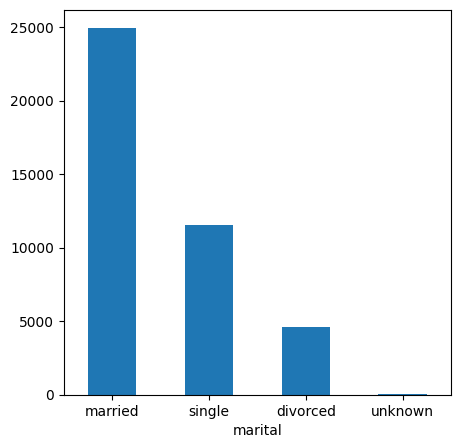

In [10]:
plt.figure(figsize=(5, 5))
bank_client['marital'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

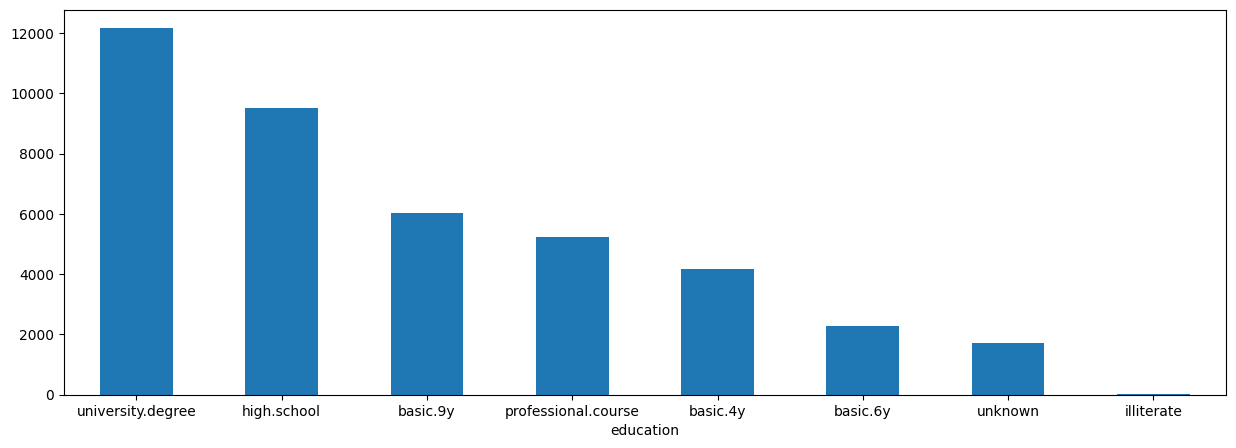

In [11]:
plt.figure(figsize=(15, 5))
bank_client['education'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

**Висновки з завдання 6 (детальні)**

1. На виведених графіках можна замітити тяжкі праві хвости   
2.   
3. ...

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

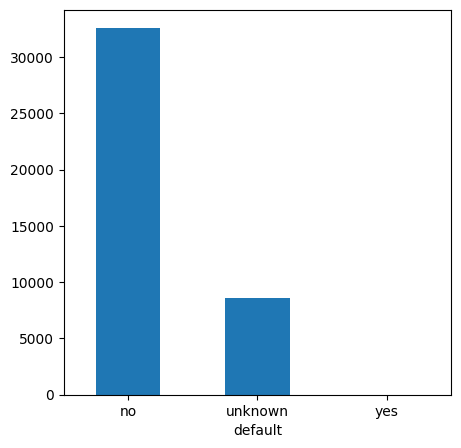

In [12]:
plt.figure(figsize=(5, 5))
bank_client['default'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

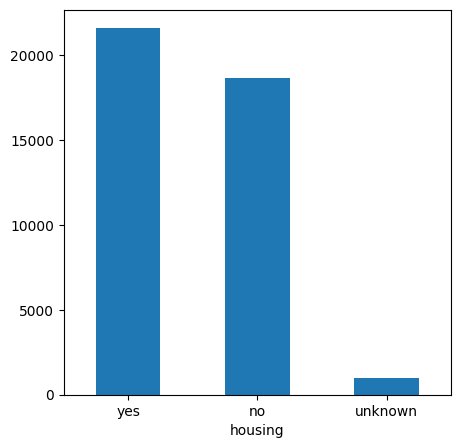

In [13]:
plt.figure(figsize=(5, 5))
bank_client['housing'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

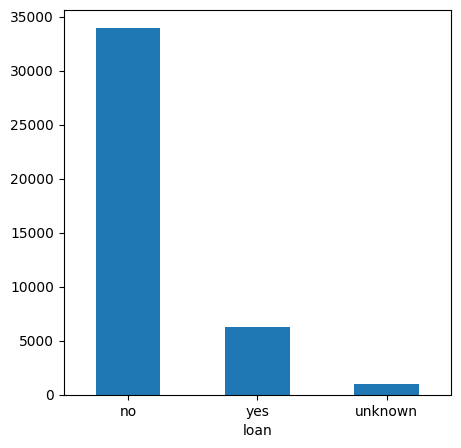

In [14]:
plt.figure(figsize=(5, 5))
bank_client['loan'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [15]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(not_null)
      
    return df

In [16]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [17]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  
  dataframe[age_col + '_qcut'] = pd.qcut(dataframe[age_col], 4, labels=False)
  
  return dataframe

In [18]:
bank_client = encode_age(bank_client, 'age')
print(bank_client['age_qcut'].unique())


[3 1 2 0]


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних
Перетворення age пройшло успішно і було поділено на 4 секції

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [19]:
bank_relat = dataset[['contact','month','day_of_week','duration']]

columns = ['contact','month','day_of_week','duration']
for col in columns:
    print(f"Count of NaN: {col}: {bank_relat[col].isna().sum()}\n")

Count of NaN: contact: 0

Count of NaN: month: 0

Count of NaN: day_of_week: 0

Count of NaN: duration: 0



**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [20]:
for col in columns:
    print(f"Unique for {col}: {bank_relat[col].unique()}\n")

Unique for contact: ['telephone' 'cellular']

Unique for month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique for day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

Unique for duration: [ 261  149  226 ... 1246 1556 1868]



# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



<Axes: xlabel='duration', ylabel='Density'>

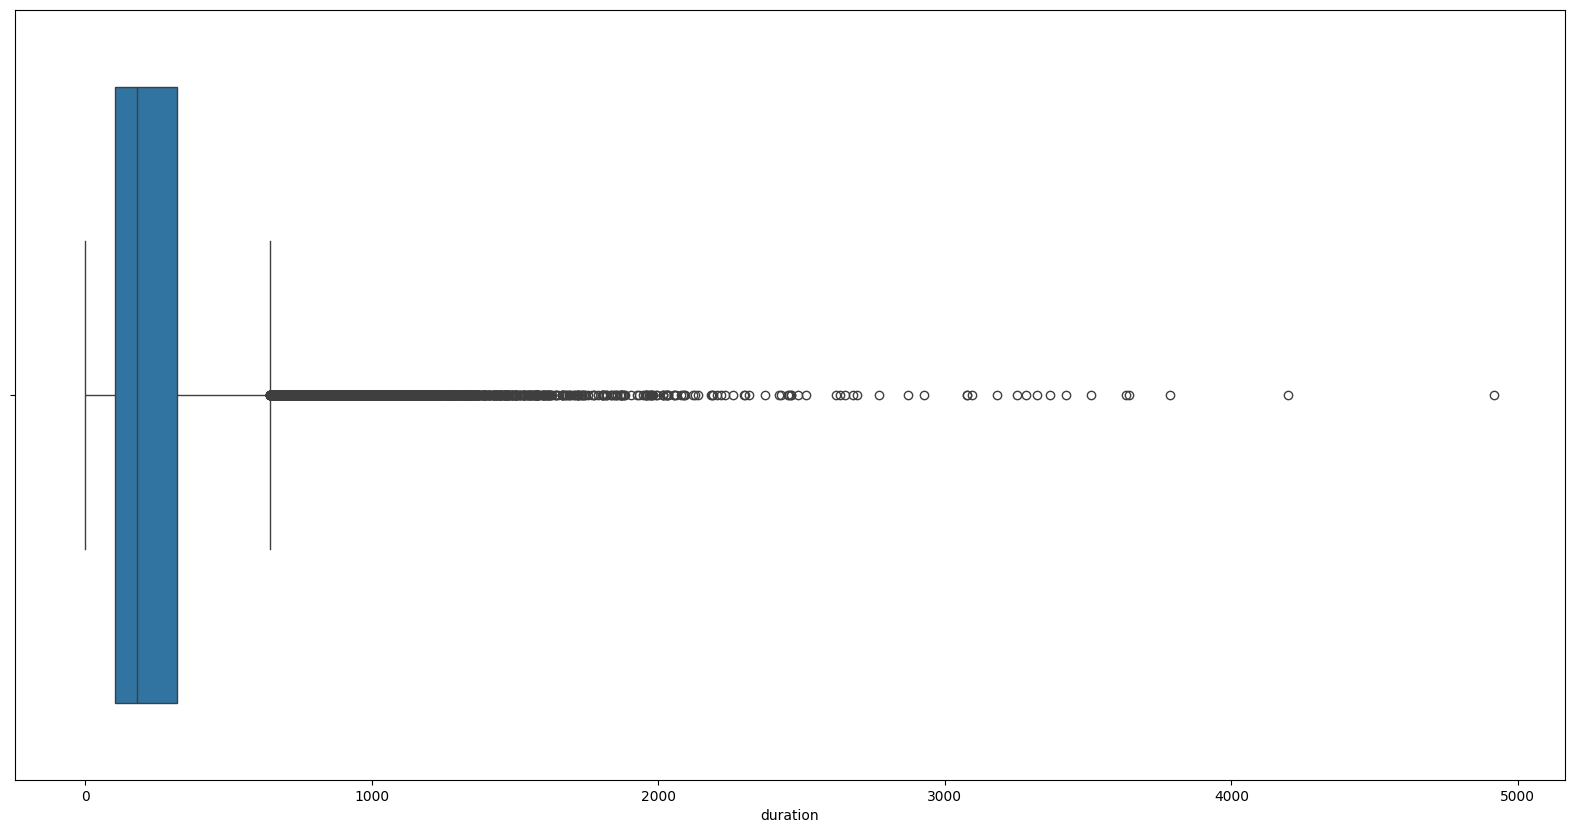

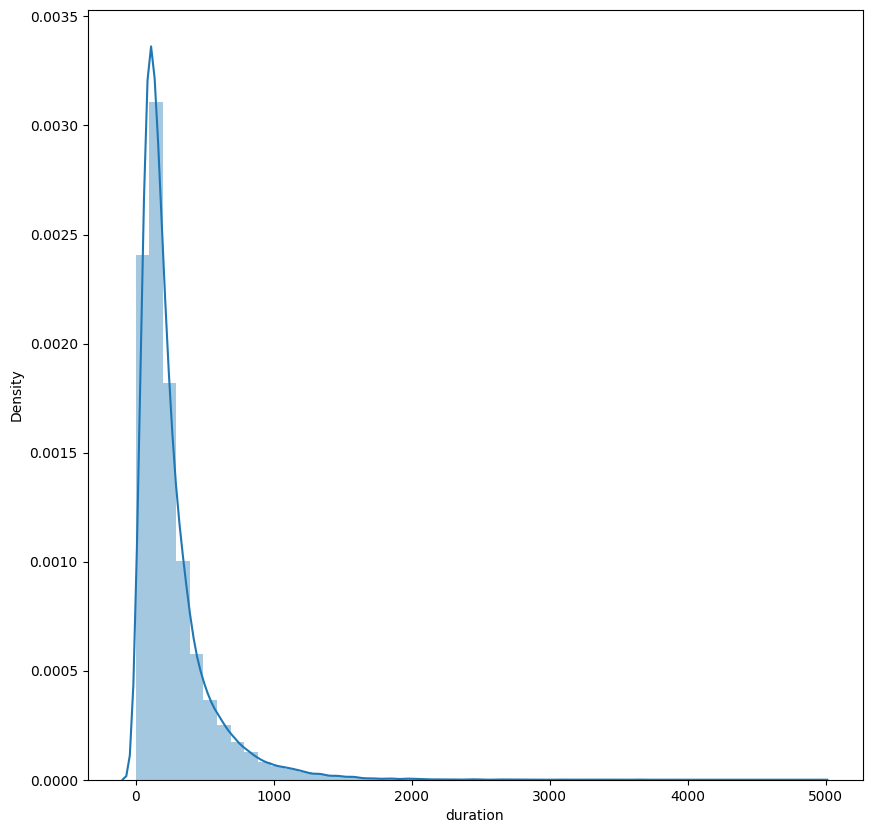

In [21]:

plt.figure(figsize=(20,10))
sns.boxplot(x='duration',data=bank_relat)
plt.figure(figsize=(10,10))
sns.distplot(bank_relat['duration'])

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [22]:
columns = ['contact','month','day_of_week']
encode = encode_categorical_columns(bank_relat,columns)
print(encode)

       contact  month  day_of_week  duration
0            1      6            1       261
1            1      6            1       149
2            1      6            1       226
3            1      6            1       151
4            1      6            1       307
...        ...    ...          ...       ...
41183        0      7            0       334
41184        0      7            0       383
41185        0      7            0       189
41186        0      7            0       442
41187        0      7            0       239

[41188 rows x 4 columns]


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [23]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
  
  dataframe[duration_col + '_qcut'] = pd.qcut(dataframe[duration_col], 4, labels=False)
          
  return dataframe



In [24]:
bank_relat = encode_duration(bank_relat, 'duration')
print(bank_relat['duration_qcut'].unique())

[2 1 3 0]


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [25]:
bank_socec = dataset[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [26]:
bank_other = dataset[['campaign','pdays','previous','poutcome']]


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [27]:
poutcome_map = {"failure": 0, "nonexistent": 1, "success": 2}
bank_other['poutcome'] = bank_other['poutcome'].map(poutcome_map)
print(bank_other[['poutcome']])

       poutcome
0             1
1             1
2             1
3             1
4             1
...         ...
41183         1
41184         1
41185         1
41186         1
41187         0

[41188 rows x 1 columns]


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [28]:
bank_final= pd.concat([bank_client,bank_socec,bank_relat,bank_other],axis=1) 
print(bank_final.head())


   age  job  marital  education  default  housing  loan  age_qcut  \
0   56    3        1          0        0        0     0         3   
1   57    7        1          3        1        0     0         3   
2   37    7        1          3        0        2     0         1   
3   40    0        1          1        0        0     0         2   
4   56    7        1          3        0        0     2         3   

   emp.var.rate  cons.price.idx  ...  nr.employed  contact  month  \
0           1.1          93.994  ...       5191.0        1      6   
1           1.1          93.994  ...       5191.0        1      6   
2           1.1          93.994  ...       5191.0        1      6   
3           1.1          93.994  ...       5191.0        1      6   
4           1.1          93.994  ...       5191.0        1      6   

   day_of_week  duration  duration_qcut  campaign  pdays  previous  poutcome  
0            1       261              2         1    999         0         1  
1           

**Завдання 19** Провести ділення вибірки

In [29]:
target = bank_target["y"]
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold


In [30]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, target, 0.2, 10, 101)

In [31]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [32]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [33]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7071  208]
 [ 583  376]]
90.0


## k-NN

k=1 88.36 (+/- 0.49)
k=2 89.85 (+/- 0.53)
k=3 89.82 (+/- 0.51)
k=4 90.16 (+/- 0.49)
k=5 90.26 (+/- 0.46)
k=6 90.40 (+/- 0.43)
k=7 90.58 (+/- 0.39)
k=8 90.66 (+/- 0.44)
k=9 90.73 (+/- 0.56)
k=10 90.64 (+/- 0.58)
k=11 90.74 (+/- 0.60)
k=12 90.71 (+/- 0.53)
k=13 90.83 (+/- 0.53)
k=14 90.73 (+/- 0.52)
k=15 90.81 (+/- 0.55)
k=16 90.73 (+/- 0.57)
k=17 90.89 (+/- 0.55)
k=18 90.76 (+/- 0.53)
k=19 90.82 (+/- 0.51)
k=20 90.81 (+/- 0.51)
k=21 90.83 (+/- 0.43)
k=22 90.73 (+/- 0.44)
k=23 90.83 (+/- 0.41)
k=24 90.73 (+/- 0.47)
k=25 90.75 (+/- 0.48)
The optimal number of neighbors is 16 with 90.9%


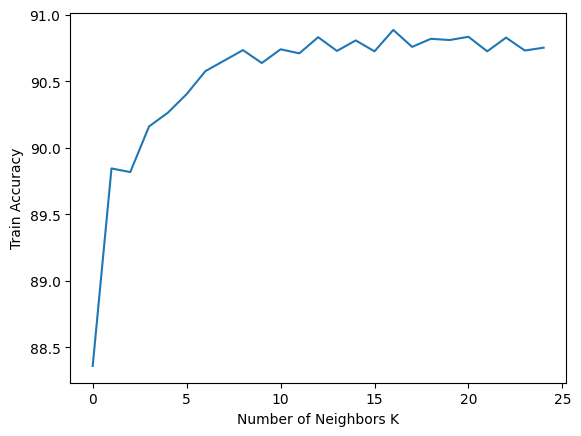

In [34]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7127  152]
 [ 637  322]]
90.0


## Логістична Регресія

In [36]:
models = pd.DataFrame({
                'Models': 'LogisticRegression',
                'Score':  [LOGCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,LogisticRegression,0.904105


**Висновки по моделям (детальні)**

1.   У логістичні регресії було виведені такі значення:

Матриця плутанини:
  Перший ряд:

    7071: Це приклади які були правильно класифіковані як перший клас

    208: Це приклади які були помилково класифіковані як другий клас

  Другий ряд:

    583: Це приклади які були помилково класифіковані як перший клас

    376: Це приклади які були правильно класифіковані як другий клас

  Точність: 90%  



2.  У KNN було виведені такі значення:

Матриця плутанини:

  Перший ряд:

    7127: Це приклади які були правильно класифіковані як перший клас

    152: Це приклади які були помилково класифіковані як другий клас

  Другий ряд:

    637: Це приклади які були помилково класифіковані як перший клас

    322: Це приклади які були правильно класифіковані як другий клас

  Точність: 90%

